## Welcome to the Machine Learning Library! 

![alt text](https://cdn.wallpapersafari.com/89/75/7ORakF.jpg)

#### All things 'Machine Learning' can be found in this space. 

#### A useful tool might be the *table of contents* found below. 

# Table of Contents 

[1. Useful Preliminary Steps](#Useful-Preliminary-Steps)
   - [1.1. Imports and starter tools](#1.1.-Imports-and-starter-tools)
   - [1.2. Exploratory Data Analysis (numeric data ideal for Regression)](#1.2.-Exploratory-Data-Analysis-(numeric-data-ideal-for-Regression))
   - [1.3. General Machine Learning Nuggets](#1.3.-General-Machine-Learning-Nuggets)
   - [1.4. Helpful Functions](#1.4.-Helpful-Functions)

[2. Advanced Regression](#2.-Advanced-Regression)

[3. Advanced Classification](#3.-Advanced-Classification)

[4. Unsupervised Learning](#4.-Unsupervised-Learning)

[Extras](#Extras)

---

# 1. Useful Preliminary Steps 

### 1.1. Imports and starter tools

This section outlines any useful code in preparing the data before the actual machine learning take place. This includes useful (conventional) EDA, pre-processing etc. 

In [ ]:
# useful (conventional) imports to start you off

# the bread and butter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# take care of those annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading in csv datasets and converting to dataframe 

# reading in csv data from local file
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

# reading in csv from GitHub
df_train = pd.read_csv('https://github.com/df_train.csv?raw=true')
df_test = pd.read_csv('https://github.com/df_test.csv?raw=true')

# if working in kaggle/github, ensure you copy the path to the dataset when reading in data 

{below} Here's a nifty tool to change the default number of rows/columns being displayed if you calling out a dataframe

In [ ]:
# default value of rows is 10
pd.set_option('max_rows', 10)

# default value of columns is 50
pd.set_option('max_columns', 50) 

---

### 1.2. Exploratory Data Analysis (numeric data ideal for Regression)

In [ ]:
# let's get all the conventional stuff out of the way...

df.shape # get the shape of the dataframe

df.info # get info of which columns are ints, floats or objects (i.e - categorical data)

df.isnull().sum() # check for missing values within the data

What if we want to check the percentage of missing values of each column from highest to lowest? 

In [ ]:
# equation to calculate percentation of null values (for both train and test datasets)
train_nulls = round((df_train.isnull().sum()/df_train.isnull().count())*100,2)
test_nulls = round((df_test.isnull().sum()/df_test.isnull().count())*100,2)

# creating a dictionary
name_convention = {'% missing training set': train_nulls, '% missing testing set': test_nulls}

# creating a dataframe from the dictionary
pd.DataFrame(data=name_convention).sort_values(by='% missing training set',ascending=False).head()

What if we want to visualize these missing values? 

(more info here: [GeeksforGeeks Visualize missing values](https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/))

In [ ]:
# import library to view missing values
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(df)

{code above} How does a sample of the output look? [matrix of missing values](https://media.geeksforgeeks.org/wp-content/uploads/20190703001850/nan_0.png)

{code below} What if you'd like to view the missing data as a bar chart?

In [ ]:
# Visualize missing values as a barplot
msno.bar(df)

{code above} How does a sample of the output look? [bar chart of missing values](https://media.geeksforgeeks.org/wp-content/uploads/20190703002215/nan_1.png)

---

### 1.3. General Machine Learning Nuggets

{below} here's a refresher of the general train/validation/test split ...

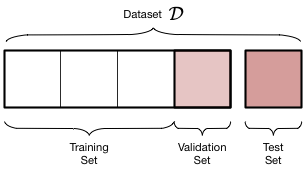

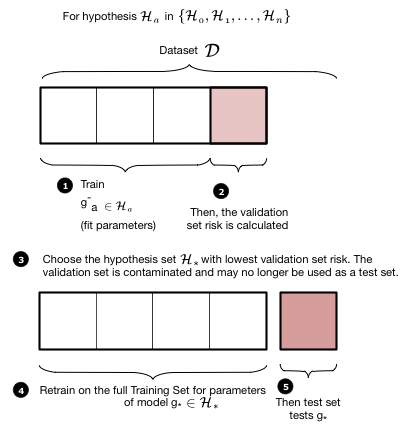

{below) A more advance method would include k-folds ...

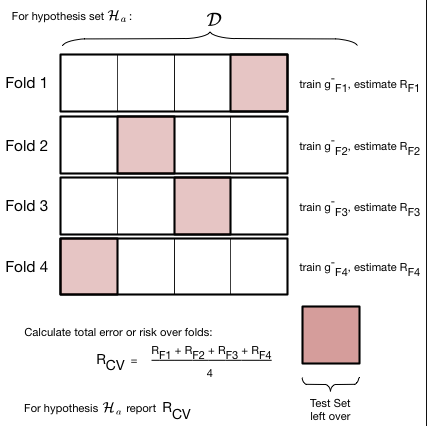

---

### 1.4. Helpful Functions

#### a) Function 1: Function to determine the number of missing entries for a specified column in the dataset

In [ ]:
### START FUNCTION_
def total_missing(df,column_name):
    '''
    Function to determine the number of missing entries for a specified column in the dataset
    '''
    
    return sum(df[column_name].isnull())

### END FUNCTION_

#### b) Function 2: Function that takes in as input a dataframe and a column name, and returns the mean for numerical columns and the mode for non-numerical columns

In [ ]:
###  START FUNCTION_
def calc_mean_mode(df, column_name):
    '''
    Function that takes in as input a dataframe and a column name, 
    and returns the mean for numerical columns and the mode for non-numerical columns
    '''
    
    numeric = df.select_dtypes(include=['int64', 'float64']).columns
    non_numeric = df.select_dtypes(include=['object']).columns

    if column_name in numeric:
        return round(np.mean(df[column_name]), 2)

    elif column_name in non_numeric:
        return sorted(list(df[column_name].value_counts().index[df[column_name].value_counts() 
                                                                == df[column_name].value_counts().max()]))
    else:
        raise ValueError

### END FUNCTION_

---
# 2. Advanced Regression


Adjust code according to your variables, these lines wont run as is.

In [ ]:
# reading in datasets
df=pd.read_csv('',index_col=0)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

In [ ]:
#split variables in dataset
y = df['ZAR/USD']
X = df.drop('ZAR/USD', axis=1)

In [ ]:
# split predictors and response, noticed the code is sligghtly different for multiple variables. Not sure if this matters 
#or is just another way of coding it
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [ ]:
#scale data (i.e - used to standardize data)
from sklearn.preprocessing import StandardScaler

In [ ]:
#create scaler object
scaler = StandardScaler()

In [ ]:
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [ ]:
#this is not split with scaled data, change variables accordingly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
#this is split with scaled values
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

In [ ]:
#create dataframe based on scale data
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)

#view standardised set
X_standardise.head()

### Linear Regression Model

In [ ]:
#training linear regression model
# Import the linear regression module
from sklearn.linear_model import LinearRegression

In [ ]:
# Import the linear regression module
from sklearn.linear_model import LinearRegression

In [ ]:
# create model object
lm = LinearRegression()

In [ ]:
# Fit the model to the training data (also known as training the model)
lm.fit(X_train, y_train)

In [ ]:
# Extract the intercept, or y-cut, of our linear model
a = float(lm.intercept_)

In [ ]:
# Extract the coefficient, or gradient, of our linear model
b = lm.coef_
###################################################

beta_0 = float(lm.intercept_)
# extract model coeffs for mlr
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

#create a df based on beta_js

beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [ ]:
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

In [ ]:
# Generate the values that fall along our regression line
gen_y = lm.predict(X_train)

In [ ]:
#import metrics
from sklearn import metrics

In [ ]:
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

In [ ]:
# Generate values of y from x, using the linear model
gen_y_test = lm.predict(X_test)

In [ ]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))



Mean squared error is higher on the test set than the train set, indicating poor predictive accuracy, and R-squared is lower on the test set, indicating a worse fit on the test set.

These results indicate a concept in machine learning model fitting known as overfitting. This is a phenomenon where there is:

A discrepancy between the performance of the model on train and on test sets; and
An inability of the model to generalise to data it has not seen before.
The term comes from the fact that the model fits too well, or overfits, the training data, and does not fit well, or underfits, the testing data.


In [ ]:
#creating dictionary of results
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['disp']])),
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']])),
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

In [ ]:
# create dataframe from dictionary above
results_df = pd.DataFrame(data=results_dict)

### Ridge Regression

#### NB!! Must scale data [ i.e ScandardScaler() ] before commencing with Ridge Regression!!

Only pre-lim steps. See Linear Regression Code above for whole modelling process

In [ ]:
# Separate the features from the response
X = df.drop('Target_column', axis=1)
y = df['Target_column']

In [ ]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create standardization object
scaler = StandardScaler()

In [ ]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [ ]:
# Import train/test split module
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [ ]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [ ]:
# Create ridge model
ridge = Ridge()

In [ ]:
# Train the model
ridge.fit(X_train, y_train)

In [ ]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [ ]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [ ]:
# Print out the intercept
print("Intercept:", float(b0))

In [ ]:
# Check out the coefficients
coeff

### LASSO Regression

#### NB!! Must scale data [ i.e ScandardScaler() ] before commencing with LASSO Regression!!

Only pre-lim steps. See Linear Regression Code above for whole modelling process

In [ ]:
# Separate the features from the response
X = df.drop('Target_column', axis=1)
y = df['Target_column']

In [ ]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create standardization object
scaler = StandardScaler()

In [ ]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)


In [ ]:
# Import train/test split module
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [ ]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [ ]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [ ]:
# Train the LASSO model
lasso.fit(X_train, y_train)

In [ ]:
# Extract intercept from model
intercept = float(lasso.interce

In [ ]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

In [ ]:
# Extract intercept
print("Intercept:", float(intercept))

In [ ]:
# Take a look at the co-efficient values
coeff

Probably missed out stuff but putting more Classification code as it consists of most of the marks. Did not include other models and Ridge and Lasso Regularisation. Ensemble methods not included as well


In [ ]:
#Pearson Regression, not sure if this is correlation
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Loan_Size']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['Loan_Size'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

### Pearson Correlation 

The Pearson correlation measures the linear relationship between features and assumes that the features are normally distributed. Values range between -1 (Perfect Negative Correlation) and 1 (Perfect Positive Correlation). Below is the code to output a Pearson correlation table:

In [ ]:
df.corr()

### Statistics / EDA

#### Normal Distribution 

In [ ]:
x = np.arange(-5,5,0.01)     # range of values for z
mu = 0                       # mu = 0 for standard normal
sigma = 1                    # mu = 1 for standard normal

# now calculate f(x)
f = 1 / np.sqrt ((2 * np.pi * sigma ** 2)) * np.exp (-0.5 * ((x - mu) / sigma) ** 2)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,f,'k')
plt.show()

#### Seaborn Joint-plot

https://seaborn.pydata.org/generated/seaborn.jointplot.html

---

# 3. Advanced Classification

![alt text](https://editor.analyticsvidhya.com/uploads/19808clf.jpg)

In [ ]:
# labels
y = df['insurance_claim']

# features
X = df.drop('insurance_claim', axis=1)

#### Converting to dummy variables (i.e - transforming categorical features)

In [ ]:
# Transforming the Features
X_transformed = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=50)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

#### Intercept

The interpretation of the parameters of the logistic model is not quite the same as for a linear regression model.

In binary classification, the class with value 1 is known as the reference class. Let's explore.

The intercept,  𝛽0 , is interpreted as the log odds ratio of an observation being in the reference class when all other predictor variables are equal to zero.

We can exponentiate this value, in other words raise the natural number  𝑒  to this value, to convert it to a typical odds ratio. In other words:

$$ 𝑂𝑑𝑑𝑠=𝑒𝛽0 $$

In [ ]:
lr.intercept_[0]

#### Coefficients

For binary categorical variables, like smoker and sex, the coefficient is interpreted as the log odds ratio between the class implied by a zero for the variable (i.e. non-smoker), and the class implied by a one for the variable (i.e. smoker).

For continuous variables, the coefficient is interpreted as the expected change in the log odds for a one-unit increase in the variable.

Again, we can arrive at the usual odds value by exponentiating the coefficient:

$$ 𝑂𝑑𝑑𝑠=𝑒𝛽1 $$
 
Effectively, each coefficient is a measure of the change in the log odds of belonging to the reference class for one-unit changes in the variable.

In [ ]:
coeff_df = pd.DataFrame(lr.coef_.T, X_transformed.columns, columns=['Coefficient'])
coeff_df

## Statsmodels 

Code Examples: 

 GeeksforGeeks: https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/
    
 Stackoverflow: https://stackoverflow.com/questions/61560569/simple-logistic-regression-with-statsmodels-adding-an-intercept-and-visualizing

In [ ]:
# importing libraries
import statsmodels.api as sm
import pandas as pd
 
# loading the training dataset
df = pd.read_csv('logit_train1.csv', index_col = 0)
 
# defining the dependent and independent variables
Xtrain = df[['gmat', 'gpa', 'work_experience']]
ytrain = df[['admitted']]

Xtrain = sm.add_constant(Xtrain)
  
# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()

In [ ]:
# printing the summary table
print(log_reg.summary())

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
y = df['species']
X = df.drop('species', axis=1)

In [ ]:
#Standarise the data
standard_scaler = StandardScaler()
X_transformed = standard_scaler.fit_transform(X)

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.30, random_state=50)

In [ ]:
tree = DecisionTreeClassifier(random_state=42)

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
y_pred = tree.predict(X_test)

Print how many of each class we have in this test set. Let's print that off before we print out the confusion matrix.

In [ ]:
y_test.value_counts()

In [ ]:
labels = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']

pd.DataFrame(data=confusion_matrix(y_test, y_pred), index=labels, columns=labels)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Iris-setosa', 'Iris-versicolor','Iris-virginica']))

## Random Forest Model

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

#### Feature Importance

Link: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)


In [ ]:
y = df['species']
X = df.drop('species', axis=1)

In [ ]:
#Standarise the data
standard_scaler = StandardScaler()
X_transformed = standard_scaler.fit_transform(X)

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.30, random_state=50)

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

In [ ]:
pred_forest = forest.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_forest, 
                            target_names=['Iris-setosa', 'Iris-versicolor','Iris-virginica']))

In [ ]:
from sklearn.metrics import confusion_matrix

#### Confusion Matrix

In [ ]:
confusion_matrix(y_test, pred_lm)

That doesn't look very nice - let's convert it into a dataframe and add the appropriate labels to make it clear which value is which.

The matrix orders the rows and columns in a sorted fashion according to the labels. Our labels are 0 and 1, so the first row/column is 0, and the 2nd row/column is 1. Let's give it the appropriate labels.

In [ ]:
labels = ['0: Malignant', '1: Benign']

pd.DataFrame(data=confusion_matrix(y_test, pred_lm), index=labels, columns=labels)

## Support Vector Machine

NOTE: 'C' is the penalty term. 

'RBF' = radial kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

## K-Nearest Neighbors Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, log_loss

import warnings
warnings.filterwarnings("ignore")

In [ ]:
y = df['species']
X = df.drop('species', axis=1)

In [ ]:
n_neighbors = 3 # <--- change this number to play around with how many nearest neighbours to look for.

knn = KNeighborsClassifier(n_neighbors)
# Fit the model 
knn.fit(X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]

results = []

for k in ks:
    print('Fitting KNN model with k = {:d}'.format(k))
    knn = KNeighborsClassifier(k)
    run_time = %timeit -q -o knn.fit(X_train, y_train)

    # predicting
    y_pred = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # scoring
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)
    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # save the results 
    results.append([k, accuracy, precision, recall, f1, f1_test, run_time.best])

results = pd.DataFrame(results, columns=['KNN', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('K', inplace= True)
    

#### Assess model performance

So far, we've been using the classification report and confusion matrices to assess classification model performance. However, such metrics don't do a good job at highlighting how confident our model is in its predictions.

Enter the log loss function which, unlike other metrics, can penalise predictions based on how confident a model is with those predictions. For example, if our model predicts the wrong class with high probability, the log loss penalises it more (i.e.: assigns higher log loss) compared to a model that predicts the wrong class with low probability. As such, we generally feed class probabilities into the log loss function instead of the actual class predictions (i.e. thresholded probalities).

For the log loss metric, lower is better, i.e.:, a perfect model would have a log loss of 0.

In [ ]:
# Get predictions on the test set 
y_hat = knn.predict_proba(X_test)
# Calculate the loss 
print("The log loss error for our model is: ", log_loss(y_test, y_hat))

## NLP 

dropna() : https://www.geeksforgeeks.org/python-pandas-dataframe-dropna/

reset index : https://www.geeksforgeeks.org/python-pandas-dataframe-reset_index/

In [ ]:
df.reset_index(inplace = True)

In [ ]:
# Important libraries

import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set()

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize, TreebankWordTokenizer

from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer


*See supporting notebook (in repo) for individual text cleaning juices*

#### Pre-Processing

In [ ]:
#cleaning text
def clean_text(text):
    """
    This function uses regular expressions to remove html characters,
    punctuation, numbers and any extra white space from each text
    and then converts them to lowercase.

    Input:
    text: original text
          datatype: string

    Output:
    texts: modified text
           datatype: string
    """
    # replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)
#    Removal of numbers
#    text = re.sub(r'\d+', ' ', text)
    # will replace newline with space
    text = re.sub("\n"," ",text)
    # will convert to lower case
    text = text.lower()
    # will split and join the words
    text=' '.join(text.split())
    
    return text

In [ ]:
# Application of the function to clean the tweets
train['text'] = train['text'].apply(clean_text)
test['text'] = test['text'].apply(clean_text

In [ ]:
# Replace '.txt' with 'text file'
train["text"] = train["text"].str.replace(".txt", " text file")
test["text"] = test["text"].str.replace(".txt", " text file")

In [ ]:
import string
import re
import nltk
from nltk.tokenize import TweetTokenizer

tweet = "first think another Disney movie, might good, it's kids movie. watch it, can't help enjoy it. ages love movie. first saw movie 10 8 years later still love it! Danny Glover superb could play"

def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

cleaned_tweet = clean_text(tweet)
tt = TweetTokenizer()
print(tt.tokenize(cleaned_tweet))

In [ ]:
# Creating Function for Model Building

def models_building(classifiers, X_train, y_train, X_val, y_val):
    """
    This function takes in a list of classifiers
    and both the train and validation sets
    and return a summary of F1-score and
    processing time as a dataframe

    Input:
    classifiers: a list of classifiers to train
                 datatype: list
    X_train: independent variable for training
             datatype: series
    y_train: dependent variable for training
             datatype: series
    X_val: independent variable for validation
           datatype: series
    y_val: dependent variable for validation
           datatype: series

    Output:
    model_summary: F1 Score for all the classifiers
                   datatype: dataframe
    """

    models_summary = {}

    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                                       max_df=0.9,
                                                       ngram_range=(3, 6),
                                                       analyzer='char')),
                             ('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_val)
        run_time = time.time()-start_time

        # Output for each model
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_val, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')


### Hyperparameter Tuning on Most Performing Models

In [ ]:
# Creating a pipeline for the gridsearch
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid

HP_MNB = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.9,
                                                ngram_range=(3, 6),
                                                analyzer='char')),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

HP_MNB.fit(X_train, y_train)  # Fitting the model

y_pred_mnb = HP_MNB.predict(X_val)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_mnb))

In [ ]:
# Execution of the Classifiers

classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)
ordered_df = classifiers_df.sort_values('F1-Macro', ascending=False)
ordered_df


Training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

Pro-tip: in the multi-class case we referred to above, the LogisticRegression instance takes a simple argument which enables it to be used for 2+ classes: multi_class='ovr'. We'll revisit this later in the course

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
pred_lr = lr.predict(X_test)

Advantages & Disadvantages of Logistic Regression
Advantages

Convenient probability scores for observations (probability of each outcome is transformed into a classification);
Not a major issue if there is collinearity among features (much worse with linear regression).
Disadvantages

Can overfit when data is unbalanced (i.e.: we have far more observations in one class than the other);
Doesn't handle large number of categorical variables well.

Metrics

In [ ]:
confusion_matrix(y_test, pred_lm)

In [ ]:
labels = ['0: Malignant', '1: Benign']

pd.DataFrame(data=confusion_matrix(y_test, pred_lm), index=labels, columns=labels)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print('Classification Report')
print(classification_report(y_test, pred_lm, target_names=['0: Malignant', '1: Benign']))

### Overall Accuracy

The results shown above lead us to our first classification metric: **overall accuracy**, which we calculate according to the following formula:

$$Accuracy =  \frac{Correct\space predictions}{Total\space predictions} = \frac{TP + \space TN}{TP \space + \space TN \space + \space FP \space + \space FN}$$

Our overall accuracy is calculated as follows:

$$Accuracy =  \frac{Correct\space predictions}{Total\space predictions} = \frac{70 + 36}{70 + 36 + 3 + 3} = 0.946$$

At first glance this appears to a useful, catch-all metric which tells us everything we need to know about our model. The problem is that it lacks detail.

Consider the following scenario:

- We have 100 observations in our test dataset: 90 of them are labelled _No_ , the remaining 10 labelled _Yes_. 

- At prediction time, our model classifies all 100 observations to be in category _No_. Our model made 100 predictions, and got all 90 of the _No_ observations correct, giving it an overall accuracy of 90%!

- Sounds good right? The problem is that the model got literally none of the _Yes_-labelled observations correct - 0/10! What if the _Yes_ cases were for patients have cancer, or a transaction that is fraudulent? Those are important results, and we would have missed all of them.

- Hopefully, that has highlighted the importance of being accurate not just overall, but in each particular class too.

Let's look at few metrics which are a little more comprehensive.

#### Precision

When it predicts _yes_, how often is it correct? 

$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$

#### Recall

When the outcome is actually _yes_, how often do we predict it as such?

$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$

#### F1 Score

Weighted average of precision and recall. 

$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print('Classification Report')
print(classification_report(y_test, pred_lm, target_names=['0: Malignant', '1: Benign']))

# 4. Unsupervised Learning

[Unsupervised Spreadsheet Learning Bank [Spreadsheet] ](https://docs.google.com/spreadsheets/d/1FJlo2nWxotGfttzj2t5Pa0S4QABOwukJE6c946T-DUM/edit#gid=620378126)

| No. | EDSA Notebook URL |
| ----------- | ----------- |
| 1 |[Principal Component Analysis](https://github.com/Gabe-Maja/Explore-Material/blob/main/8%20-%20Unsupervised%20Learning%20/2%20-%20Train/1%20-%20Principal-component-analysis.ipynb)||
| 2 |[Advanced Dimensionality Reductionn Techniques](https://github.com/Gabe-Maja/Explore-Material/blob/main/8%20-%20Unsupervised%20Learning%20/2%20-%20Train/2%20-%20Advanced-DR-techniques.ipynb)|
| 3 |[K-Means Clustering](https://github.com/Gabe-Maja/Explore-Material/blob/main/8%20-%20Unsupervised%20Learning%20/2%20-%20Train/3%20-%20Kmeans_clustering.ipynb)|
| 4 |[Hierarchical Clustering](https://github.com/Gabe-Maja/Explore-Material/blob/main/8%20-%20Unsupervised%20Learning%20/2%20-%20Train/4%20-%20Hierarchical-clustering.ipynb)|
| 5 |[Gaussian Mixture Models](https://github.com/Gabe-Maja/Explore-Material/blob/main/8%20-%20Unsupervised%20Learning%20/2%20-%20Train/5%20-%20GMM.ipynb)|
| 6 |[Clustering and Geospatial Analysis](https://github.com/Gabe-Maja/Explore-Material/blob/main/8%20-%20Unsupervised%20Learning%20/2%20-%20Train/6%20-%20Clustering_and_geospatial_analysis.ipynb)|
| 7 |[Introduction to Recommender Systems: Part 1](https://github.com/Gabe-Maja/Explore-Material/blob/main/8%20-%20Unsupervised%20Learning%20/2%20-%20Train/7%20-%20Introduction_to_recommender_systems_Part1.ipynb)|
| 8 |[Introduction to Recommender Systems: Part 2](https://github.com/Gabe-Maja/Explore-Material/blob/main/8%20-%20Unsupervised%20Learning%20/2%20-%20Train/8%20-%20Introduction_to_recommender_systems_Part2.ipynb)|

# Extras

Get most common value in column of Pandas DataFrame: https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column/48590361

Subset Pandas Data: https://www.geeksforgeeks.org/how-to-select-a-subset-of-a-dataframe/